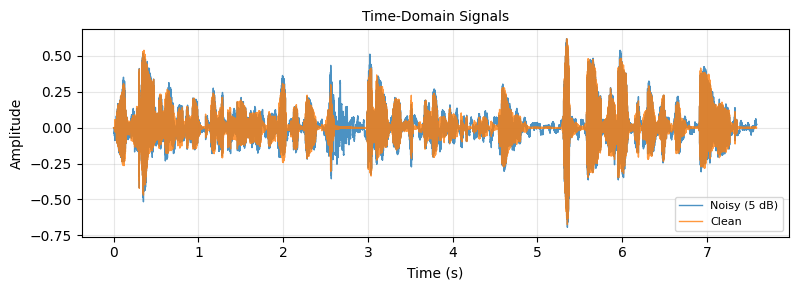

In [1]:
from core.audio_io import load_audio, play_audio, save_audio, normalize
from core.mixing import mix_with_snr
from core.visualization import plot_waveforms, plot_spectrogram

clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/office.wav")

noisy, _ = mix_with_snr(clean, noise, snr_db=5)

plot_waveforms(
    [noisy, clean],
    ["Noisy (5 dB)", "Clean"],
    fs,
    "Time-Domain Signals"
)

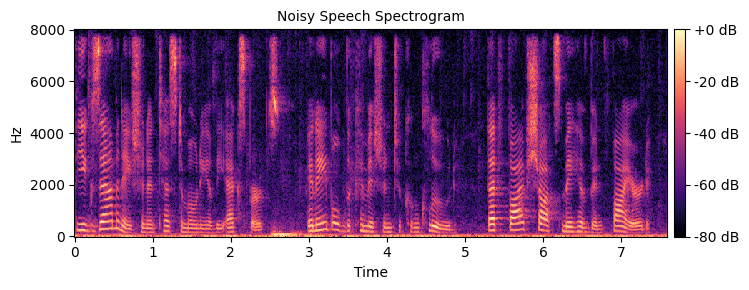

In [2]:
plot_spectrogram(noisy, fs, "Noisy Speech Spectrogram")

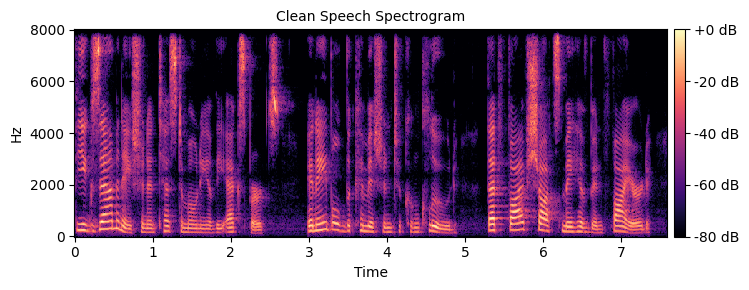

In [3]:
plot_spectrogram(clean, fs, "Clean Speech Spectrogram")

In [4]:
# mix the clean and noise at 5 dB SNR and play the noisy signal
from analysis.noise_classifier import classify_noise

clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/environment.wav")
noise = normalize(noise)

noisy, _ = mix_with_snr(clean, noise, snr_db=2)

play_audio(noisy, fs)


In [5]:
from core.audio_io import load_audio
from core.mixing import mix_with_snr
from analysis.noise_classifier import classify_noise
from analysis.noise_classifier import classify_noise_DEBUG

clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/white.wav")
noise = normalize(noise)
noisy, _ = mix_with_snr(clean, noise, snr_db=0)

noise_type = classify_noise(noisy, fs)
print("Detected noise type:", noise_type)



Detected noise type: stationary


In [6]:
from core.audio_io import load_audio, normalize, play_audio
from core.mixing import mix_with_snr
from enhancement.spectral_subtraction import spectral_subtraction
from enhancement.wiener_static import wiener_filter_static
from evaluation.benchmarking import evaluate_method, print_results

clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/white.wav")
noise = normalize(noise)
noisy, _ = mix_with_snr(clean, noise, snr_db=5)

x_ss = spectral_subtraction(noisy, fs)
x_wiener = wiener_filter_static(noisy, fs)

print("Noisy")
play_audio(normalize(noisy), fs)


Noisy


In [7]:
res_ss = evaluate_method(clean, noisy, x_ss)
print("Spectral Subtraction")
print_results(res_ss)
play_audio(normalize(x_ss), fs)

Spectral Subtraction
SNR_in (dB)           : 5.000
SNR_out (dB)          : 9.015
SNR_improvement (dB)  : 4.015
Segmental_SNR (dB)    : 2.396
MSE                   : 5.21e-04
LSD                   : 18.448


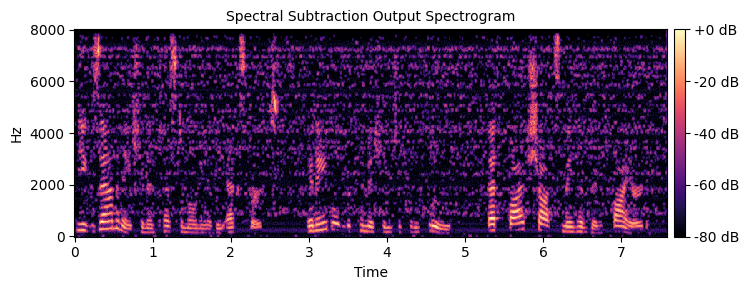

In [8]:
plot_spectrogram(x_ss, fs, "Spectral Subtraction Output Spectrogram")

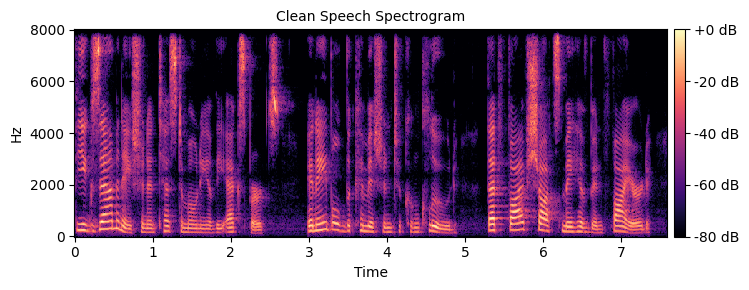

In [9]:
plot_spectrogram(clean, fs, "Clean Speech Spectrogram")

In [10]:
res_wiener = evaluate_method(clean, noisy, x_wiener)
print("Wiener Filter")
print_results(res_wiener)
play_audio(normalize(x_wiener), fs)

Wiener Filter
SNR_in (dB)           : 5.000
SNR_out (dB)          : 5.015
SNR_improvement (dB)  : 0.015
Segmental_SNR (dB)    : -4.836
MSE                   : 0.001
LSD                   : 31.477
